## Introduction

Fluid dynamics are governed by the famous Navier Stokes equations, which at their core express the conservation of momentum within a general fluid in a general environment [1].  However, despite their apparent simplicity, the general form of these equations are exceedingly challenging to solve [1].  In many general cases, the equations are actually impossible to solve [2].

The impossibility of solving these equations is caused by their complexity, with the equations consisting of a large number of inter-related components, but also by the non-linear combination of these terms [1].  This inherent non-linearity results in equations that are particularly challenging to solve numerically leading to impractical computational requirements and timescales [3].

Add on to this our relatively immature understanding of and ability to model turbulence within flows, and it quickly becomes evident why a general solution to the Navier Stokes equations remains one of the last remaining unsolved challenges in applied mathematics and science [4].

For these key reasons, considerable effort has been placed into devising numerical methods capable of efficiently and accurately solving variants of the full Navier Stokes equations.  

Primarily, these efforts have been concentrated in two key areas.  Firstly, efficient numerical schemes have been devised to reduce the computational workload of solving the equations as well as increase the resulting accuracy for a given computational complexity (such as Spectral Methods or Fractional Time Splitting) [5].  Secondly, simplifications have been sought to the full Navier Stokes equations which are aimed at reducing the overall complexity of the equations being solved [3].

These simplifications almost universally require the introduction of assumptions into our consideration of a given flow scenario, and these assumptions typically reduce the accuracy of the obtained results [6].  However, by carefully considering the flow scenario in question, assumptions can be chosen which still maintain numerical results which have acceptable accuracy compared to the real-world flow [6].

In doing so, these assumptions are then able to reduce the complexity of the full Navier Stokes equations being considered, resulting in a numerically tractable form of the equations.

These aforementioned assumptions can include many forms including assumptions regarding the boundary conditions of the flow field, the pressure variations and the velocity variations within the domain.  However, one of the most effective simplifications possible (in terms of reducing computational complexity) in the assumption of inviscid behaviour [6].  By assuming all viscous effects to be negligible within the fluid being simulated, the most complex of terms within the Navier Stokes equations can be reduced to zero leading to significantly more performant numerical algorithm [7].

Crucially however, when applied in the right conditions, these simplifications can have exceedingly small effects on the accuracy of the simulated flow field [7].  This means that we gain significant performance benefits for very little (if any) detectable errors in our final solutions.  Even in situations where the assumptions introduce a relatively larger error, these can still be deemed to be acceptable so long as the regions of inaccuracy and type of inaccuracy in the final solution are well understood [8].

For these reasons, even today in the age of high power computing, many fluid studies ranging from wind turbine design to aircraft design begin with simulations built on the Euler equations and their associated simplifications [8].  Because of its importance, we will embark on a detailed analysis of the Euler equations and the numerical methods commonly used to solve them.  In doing so, we will investigate the rates of convergence and accuracy of a range of methods before finally investigating potential complications that can be re-introduced to the Euler equations to help it better represent real world flows in complex fluid scenarios.

## Numerical Background

We start by writing down some of the Navier-Stokes equations. The Navier-Stokes equations can be used to model the weather, ocean currents, water flow in a pipe and air flow around a wing.

The 2D Navier-Stokes equations:

$\frac{\partial \omega}{\partial t}+ (u \cdot \nabla) \omega = \frac{1}{Re} \nabla^2 \omega$

$\nabla^2 u = e_z \times  \nabla \omega$

$e_z \cdot \nabla \times  u= \omega$

$u=0$

our domain $\Omega = [-1, 1] \times  [-1,1]$

Temporal discretization:

On the 2D Navier-Stokes equations we can perfomr AB, Crank Nicolson which give 2nd order accuracy. We can use a 2nd order Runge-Kutta scheme for the first time step.

Spatial Discretization:

We can use Finite differences.
https://www.slideserve.com/lyle/solution-of-2d-navier-stokes-equations-in-velocity-vorticity-formulation-using-fd

The 1-D flow of an inviscid and compressible gas obeys the conservation laws for mass, momentum and energy:

$$\frac{\partial U}{\partial t} + \frac{\partial F(U)}{\partial x}=0$$

$$U=\begin{pmatrix}
p \\
m \\
e
\end{pmatrix},F=\begin{pmatrix}
m \\
(m^2/p)+p \\
(e+p)m/p
\end{pmatrix}$$

We can write down the 1D Navier-Stokes equation:

$u_t +u u_x = \nu u_{xx}$

Notice that this equation is missing the pressure gradient

Where $\nu$ is the kinemati viscosity or $\frac{1}{Re}$.

We can do a basic discretization (forward eular in time, central difference in space):

$\frac{U^{n+1}_j - U^n_j}{\Delta t} + U^n_{j} \frac{  U^n_{j+1} - U^n_{j-1}}{2 \Delta x} = \nu \frac{1}{\Delta x^2} (U^n_{j-1} - 2 U^n_j + U^n_{j+1})$

The 2D Navier-Stokes equations:

$\frac{\partial u}{\partial t}+ (u \cdot \nabla) u = -1/ \rho \nabla p+\frac{1}{Re} \nabla^2 u$

$\nabla \cdot u=0$

$u$ is velocity

$p$ is pressure

$1/Re$ is kinematic viscosity ($\nu$)

$\rho$ is density

$-1/ \rho \nabla p$ is the pressure gradient

For 2D Navier-Stokes we need to solve the following:

$u_t + u u_x + v u_y = \nu u_{xx} + \nu u_{yy}$

$v_t + u v_x + v v_y = \nu v_{xx} + \nu v_{yy}$

The 2D Laplacian can be discretized like so:

$\nabla ^2 f(x,y)= \frac{f(x-\Delta x,y) + f(x+\Delta x,y) + f(x,y-\Delta x) + + f(x,y+\Delta x)- 4f(x,y)}{\Delta x^2}$

In [3]:
#imports and settings
%matplotlib inline
%precision 16

import numpy
import matplotlib.pyplot as plt

In [4]:
###useful functions
def grid_points(a, b, m, grid_type='uniform'):
    """Returns a set of m grid points between a and b
    
    The parameter `grid_type` determines what the distribution of 
    points is.
     - grid_type = 'uniform' - Uniform distribution of points
     - grid_type = 'right_layer' - Clustered near right boundary
     - grid_type = 'random' - Randomly distributed
     - grid_type = 'chebyshev' - Chebyshev extreme points
    """
    # Computational grid
    z = numpy.linspace(0, 1, m + 2)
    
    if grid_type.lower() == "uniform":
        x = a + (b - a) * z
    elif grid_type.lower() == "right_layer":
        x = a + (b - a) * (1.0 - (1.0 - z)**2)
    elif grid_type.lower() == "random":
        x = numpy.empty(m + 2)
        x[1:-1] = a + (b - a) * numpy.sort(numpy.random.uniform(size=(m)))
        x[0] = a
        x[-1] = b
    elif grid_type.lower() == "chebyshev":
        x = a + (b - a) * 0.5 * (1.0 + numpy.cos(numpy.pi * (1.0 - z)))
    else:
        raise ValueError("Unknown grid type.")
    
    return x

def take_2D_Central_difference(U, delta_x, direction ='x', n = 0):
    """Returns the central difference of a 2D vector in the x direction
        - n = time slice
        - direction = can either be 'x' or 'y'
    """
    diff = numpy.zeros_like(U)
    # if the ndim is == 2 then there is no time value 
    if (U.ndim == 2):
        if (direction=='x'):
            diff[1:-1, 1:-1] = (U[1:-1,2:] - U[1:-1,:-2]) / (2.0 * delta_x)
            return diff
        elif (direction=='y'):
            diff[1:-1, 1:-1] = (U[2:,1:-1] - U[:-2,1:-1]) / (2.0 * delta_x)
            return  diff
    # if the ndim is == 3 the first index is the time slice 
    elif (U.ndim == 3):
        if (direction=='x'):
            diff[n ,1:-1, 1:-1] = (U[n,1:-1,2:] - U[n,1:-1,:-2]) / (2.0 * delta_x)
            return diff
        elif (direction=='y'):
            diff[n ,1:-1, 1:-1] = (U[n,2:,1:-1] - U[n,:-2,1:-1]) / (2.0 * delta_x)
            return diff
        
    raise RuntimeError("Unknown number of dimensions or direction")
    
def take_2D_Central_difference_2nd_derivative(U, delta_x, direction ='x', n = 0):
    """Returns the central difference of a 2D vector in the x direction
        - n = time slice
        - direction = can either be 'x' or 'y'
    """
    diff = numpy.zeros_like(U)
    # if the ndim is == 2 then there is no time value 
    if (U.ndim == 2):
        if (direction=='x'):
            diff[1:-1, 1:-1] = (U[1:-1,2:] - 2.0*U[1:-1,1:-1] + U[1:-1,:-2]) / (delta_x**2)
            return diff
        elif (direction=='y'):
            diff[1:-1, 1:-1] = (U[2:,1:-1] - 2.0*U[1:-1,1:-1] + U[:-2,1:-1]) / (delta_x**2)
            return  diff
    # if the ndim is == 3 the first index is the time slice 
    elif (U.ndim == 3):
        if (direction=='x'):
            diff[n ,1:-1, 1:-1] = (U[n,1:-1,2:] - 2.0*U[n ,1:-1,1:-1] + U[n,1:-1,:-2]) / (delta_x**2)
            return diff
        elif (direction=='y'):
            diff[n ,1:-1, 1:-1] = (U[n,2:,1:-1] - 2.0*U[n ,1:-1,1:-1] + U[n,:-2,1:-1]) / (delta_x**2)
            return diff
        
    raise RuntimeError("Unknown number of dimensions or direction")
    
def laplace(f,delta_x):
        diff = numpy.zeros_like(f)
        diff[1:-1, 1:-1]=(f[1:-1,:-2]+f[:-2,1:-1]-4*f[1:-1,1:-1]+f[1:-1,2:]+f[2:,1:-1])/(delta_x**2)
        return diff

def RK2_2D(t, U_0,a,b):
    """ implement constant step size 2 stage Runge-Kutta Method RK2"""
    
    u = numpy.zeros((t.shape[0],len(U_0)))
    u[0, :] = U_0
    delta_t = t[1] - t[0]
    
    for (n, t_n) in enumerate(t[:-1]):
        K_1 = delta_t * f(a,b, u[n])
        K_2 = delta_t * f(a,b,u[n] + K_1*0.5)
        u[n+1] = u[n] + K_2
        # we only care about the first step
        break
    return u

def solve_navier_stokes_2D_FTCS(m, t_0, t_final, viscosity, density, all_time_steps=False):
    L_B = 0.0
    R_B = 1.0

    HORIZONTAL_VELOCITY_BOTTOM = -1.0
    HORIZONTAL_VELOCITY_TOP = 1.0
    N_PRESSURE_POISSON_ITERATIONS = 50
    STABILITY_SAFETY_FACTOR = 0.5

    x =grid_points(L_B, R_B, m, grid_type='uniform')
    y =grid_points(L_B, R_B, m, grid_type='uniform')

    delta_x = x[1]-x[0]
    delta_y = y[1]-y[0]

    cfl=0.01
    delta_t = cfl * delta_x

    t = numpy.arange(t_0, t_final, delta_t)
    N = len(t)

    X, Y = numpy.meshgrid(x, y)

    u_prev = numpy.zeros_like(X)
    v_prev = numpy.zeros_like(X)
    p_prev = numpy.zeros_like(X)

    maximum_possible_time_step_length = (
        0.5 * delta_x**2 / viscosity
    )
    if delta_t > STABILITY_SAFETY_FACTOR * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")
    
    if (all_time_steps==True):    
        # Solution array
        U_u = numpy.empty((N + 1,m+2,m+2))
        U_v = numpy.empty((N + 1,m+2,m+2))
        U_p = numpy.empty((N + 1,m+2,m+2))
        U_u[0,:,:] = u_prev
        U_v[0,:,:] = v_prev
        U_p[0,:,:] = p_prev

    # Time stepping loop
    for time_val in range(N):
        #𝑢_𝑥 = (𝑈^𝑛_{𝑗+1}−𝑈^𝑛_{𝑗−1})/2Δ𝑥
        u_x_prev = take_2D_Central_difference(u_prev, delta_x, direction ='x')
        u_y_prev = take_2D_Central_difference(u_prev, delta_x, direction ='y')
        v_x_prev = take_2D_Central_difference(v_prev, delta_x, direction ='x')
        v_y_prev = take_2D_Central_difference(v_prev, delta_x, direction ='y')
        laplace__u_prev = laplace(u_prev, delta_x)
        laplace__v_prev = laplace(v_prev, delta_x)

        # Perform a tentative step by solving the momentum equation without the
        # pressure gradient
        u_tent =(u_prev+delta_t*(-(u_prev*u_x_prev+v_prev*u_y_prev)+viscosity*laplace__u_prev))
        v_tent =(v_prev+delta_t*(-(u_prev*v_x_prev+v_prev*v_y_prev)+viscosity*laplace__v_prev))

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_tent[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_tent[:, 0] = 0.0
        u_tent[:, -1] = 0.0
        u_tent[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_tent[0, :] = 0.0
        v_tent[:, 0] = 0.0
        v_tent[:, -1] = 0.0
        v_tent[-1, :] = 0.0

        d_u_tent__d_x = take_2D_Central_difference(u_tent, delta_x, direction ='x')
        d_v_tent__d_y = take_2D_Central_difference(v_tent, delta_x, direction ='y')

        # Compute a pressure correction by solving the pressure-poisson equation
        rhs = (density / delta_t*(d_u_tent__d_x+d_v_tent__d_y))

        for _ in range(N_PRESSURE_POISSON_ITERATIONS):
            p_next = numpy.zeros_like(p_prev)
            p_next[1:-1, 1:-1] = 1/4 * (
                +
                p_prev[1:-1, 0:-2]
                +
                p_prev[0:-2, 1:-1]
                +
                p_prev[1:-1, 2:  ]
                +
                p_prev[2:  , 1:-1]
                -
                delta_x**2
                *
                rhs[1:-1, 1:-1]
            )

            # Pressure Boundary Conditions: Homogeneous Neumann Boundary
            # Conditions everywhere except for the top, where it is a
            # homogeneous Dirichlet BC
            p_next[:, -1] = p_next[:, -2]
            p_next[0,  :] = 0.0 #p_next[1,  :]
            p_next[:,  0] = p_next[:,  1]
            p_next[-1, :] = 0.0

            p_prev = p_next


        d_p_next__d_x = take_2D_Central_difference(p_next, delta_x, direction ='x')
        d_p_next__d_y = take_2D_Central_difference(p_next, delta_x, direction ='y')

        # Correct the velocities such that the fluid stays incompressible
        u_next = (u_tent-delta_t / density*d_p_next__d_x)
        v_next = (v_tent-delta_t / density*d_p_next__d_y)

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_next[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_next[:, 0] = 0.0
        u_next[:, -1] = 0.0
        u_next[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_next[0, :] = 0.0
        v_next[:, 0] = 0.0
        v_next[:, -1] = 0.0
        v_next[-1, :] = 0.0

        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next
        
        if (all_time_steps==True):
            U_u[time_val+1,:,:] = u_prev
            U_v[time_val+1,:,:] = v_prev
            U_p[time_val+1,:,:] = p_prev
        
    if (all_time_steps==True):
        return X,Y,U_u,U_v,U_p
        
        
    return X,Y,u_next,v_next,p_next

def solve_navier_stokes_2D_CN(m, t_0, t_final, viscosity, density):
    L_B = 0.0
    R_B = 1.0

    HORIZONTAL_VELOCITY_BOTTOM = -1.0
    HORIZONTAL_VELOCITY_TOP = 1.0
    N_PRESSURE_POISSON_ITERATIONS = 50
    STABILITY_SAFETY_FACTOR = 0.5

    x =grid_points(L_B, R_B, m, grid_type='uniform')
    y =grid_points(L_B, R_B, m, grid_type='uniform')

    delta_x = x[1]-x[0]
    delta_y = y[1]-y[0]

    cfl=0.01
    delta_t = cfl * delta_x

    t = numpy.arange(t_0, t_final, delta_t)
    N = len(t)

    X, Y = numpy.meshgrid(x, y)

    u_prev = numpy.zeros_like(X)
    v_prev = numpy.zeros_like(X)
    p_prev = numpy.zeros_like(X)

    maximum_possible_time_step_length = (
        0.5 * delta_x**2 / viscosity
    )
    if delta_t > STABILITY_SAFETY_FACTOR * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")

    # Time stepping loop
    for _ in range(N):
        #𝑢_𝑥 = (𝑈^𝑛_{𝑗+1}−𝑈^𝑛_{𝑗−1})/2Δ𝑥
        u_x_prev = take_2D_Central_difference(u_prev, delta_x, direction ='x')
        u_y_prev = take_2D_Central_difference(u_prev, delta_x, direction ='y')
        
        u_x_n_plus_one = take_2D_Central_difference(u_n_plus_one, delta_x, direction ='x')
        u_y_n_plus_one = take_2D_Central_difference(u_n_plus_one, delta_x, direction ='y')
        
        v_x_prev = take_2D_Central_difference(v_prev, delta_x, direction ='x')
        v_y_prev = take_2D_Central_difference(v_prev, delta_x, direction ='y')
        
        v_x_n_plus_one = take_2D_Central_difference(v_n_plus_one, delta_x, direction ='x')
        v_y_n_plus_one = take_2D_Central_difference(v_n_plus_one, delta_x, direction ='y')
        
        u_xx_prev = take_2D_Central_difference_2nd_derivative(u_prev, delta_x, direction ='x')
        u_yy_prev = take_2D_Central_difference_2nd_derivative(u_prev, delta_x, direction ='y')
        
        u_xx_n_plus_one = take_2D_Central_difference_2nd_derivative(u_n_plus_one,
                                                                   delta_x, direction ='x')
        u_yy_n_plus_one = take_2D_Central_difference_2nd_derivative(u_n_plus_one,
                                                                   delta_x, direction ='y')
        
        v_xx_prev = take_2D_Central_difference_2nd_derivative(v_prev, delta_x, direction ='x')
        v_yy_prev = take_2D_Central_difference_2nd_derivative(v_prev, delta_x, direction ='y')
        
        v_xx_n_plus_one = take_2D_Central_difference_2nd_derivative(v_n_plus_one,
                                                                   delta_x, direction ='x')
        v_yy_n_plus_one = take_2D_Central_difference_2nd_derivative(v_n_plus_one,
                                                                   delta_x, direction ='y')

        # Perform a tentative step by solving the momentum equation without the
        # pressure gradient
        u_tent =(u_prev+delta_t*(-((u_prev/2.0)*(u_x_prev+u_x_n_plus_one)+ \
                                   (v_prev/2.0)*(u_y_prev+u_y_n_plus_one))+ \
                                 viscosity*(u_xx_prev+u_yy_prev+u_xx_n_plus_one+u_yy_n_plus_one)))
        v_tent =(v_prev+delta_t*(-((u_prev/2.0)*(v_x_prev+v_x_n_plus_one)+ \
                                   (v_prev/2.0)*(v_y_prev+v_y_n_plus_one))+ \
                                 viscosity*(v_xx_prev+v_yy_prev+v_xx_n_plus_one+v_yy_n_plus_one)))

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_tent[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_tent[:, 0] = 0.0
        u_tent[:, -1] = 0.0
        u_tent[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_tent[0, :] = 0.0
        v_tent[:, 0] = 0.0
        v_tent[:, -1] = 0.0
        v_tent[-1, :] = 0.0

        d_u_tent__d_x = take_2D_Central_difference(u_tent, delta_x, direction ='x')
        d_v_tent__d_y = take_2D_Central_difference(v_tent, delta_x, direction ='y')

        # Compute a pressure correction by solving the pressure-poisson equation
        rhs = (density / delta_t*(d_u_tent__d_x+d_v_tent__d_y))

        for _ in range(N_PRESSURE_POISSON_ITERATIONS):
            p_next = numpy.zeros_like(p_prev)
            p_next[1:-1, 1:-1] = 1/4 * (
                +
                p_prev[1:-1, 0:-2]
                +
                p_prev[0:-2, 1:-1]
                +
                p_prev[1:-1, 2:  ]
                +
                p_prev[2:  , 1:-1]
                -
                delta_x**2
                *
                rhs[1:-1, 1:-1]
            )

            # Pressure Boundary Conditions: Homogeneous Neumann Boundary
            # Conditions everywhere except for the top, where it is a
            # homogeneous Dirichlet BC
            p_next[:, -1] = p_next[:, -2]
            p_next[0,  :] = 0.0 #p_next[1,  :]
            p_next[:,  0] = p_next[:,  1]
            p_next[-1, :] = 0.0

            p_prev = p_next


        d_p_next__d_x = take_2D_Central_difference(p_next, delta_x, direction ='x')
        d_p_next__d_y = take_2D_Central_difference(p_next, delta_x, direction ='y')

        # Correct the velocities such that the fluid stays incompressible
        u_next = (u_tent-delta_t / density*d_p_next__d_x)
        v_next = (v_tent-delta_t / density*d_p_next__d_y)

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_next[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_next[:, 0] = 0.0
        u_next[:, -1] = 0.0
        u_next[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_next[0, :] = 0.0
        v_next[:, 0] = 0.0
        v_next[:, -1] = 0.0
        v_next[-1, :] = 0.0


        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next
        
    return X,Y,u_next,v_next,p_next

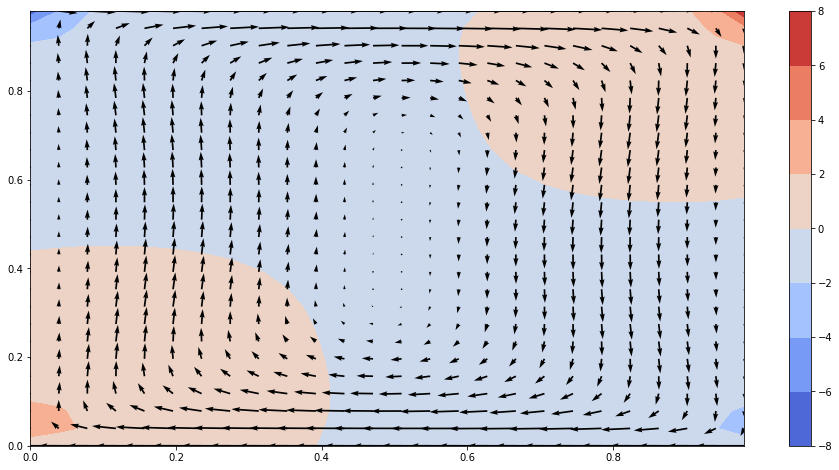

In [28]:
##initialization
m = 50
viscosity = 0.1
density = 1.0
t_0 =0.0
t_final = 1.0

X,Y,u_next,v_next,p_next = solve_navier_stokes_2D_FTCS(m, t_0, t_final, viscosity, density)

# The [::2, ::2] selects only every second entry (less cluttering plot)
#plt.style.use("dark_background")
plt.figure(figsize=(16,8))
plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="coolwarm")
plt.colorbar()

plt.quiver(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
# plt.streamplot(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
#plt.xlim((0, 1))
#plt.ylim((0, 1))
plt.show()

In [95]:
#########Animation#######
from matplotlib.animation import FuncAnimation
#from matplotlib import cm
# Enable interactive plot
%matplotlib notebook

##initialization
m = 50
viscosity = 0.1
density = 1.0
t_0 =0.0
t_final = 1.0

X,Y,U,V,P = solve_navier_stokes_2D_FTCS(m, t_0, t_final, viscosity
                                                       , density,all_time_steps=True)
fig, ax = plt.subplots(figsize=(8,8))
u=U[1]
v=V[1]
Q = ax.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2], color="black")

def animate(i,Q,X,Y):
    u=U[i]
    v=V[i]
    p = P[i]
    Q.set_UVC(u[::2, ::2],v[::2, ::2], p[::2, ::2])
    ax.set_title("t="+str(i))
    return Q,
    
ani = FuncAnimation(fig, animate,fargs=(Q,X,Y)
                    ,frames=U.shape[0],interval=10, repeat=False, blit=False)

plt.show()

<IPython.core.display.Javascript object>

The 2D Navier-Stokes equations without the pressure gradient:

$\frac{\partial \omega}{\partial t}+ (u \cdot \nabla) \omega = \frac{1}{Re} \nabla^2 \omega$

Crank Nicholson:
$$\frac{U^{n+1}_{ij} - U^n_{ij}}{\Delta t} + \frac{u_{ij}^n}{2}(\frac{U_{ij+1}^{n+1} - U_{ij-1}^{n+1}}{2 \Delta x} + \frac{U_{ij+1}^{n} - U_{ij-1}^{n}}{2 \Delta x})+\frac{v_{ij}^n}{2}(\frac{U_{i+1j}^{n+1} - U_{i-1j}^{n+1}}{2 \Delta y} + \frac{U_{i+1 j}^{n} - U_{i-1 j}^{n}}{2 \Delta y})=\frac{1}{Re}(\frac{U^n_{ij-1} - 2 U^n_{ij} + U^n_{ij+1} + U^{n+1}_{ij-1} - 2 U^{n+1}_{ij} + U^{n+1}_{ij+1}}{2 \Delta x^2} + \frac{U^n_{i-1j} - 2 U^n_{ij} + U^n_{i+1j} + U^{n+1}_{i-1j} - 2 U^{n+1}_{ij} + U^{n+1}_{i+1j}}{2 \Delta y^2} )$$

In [ ]:
##initialization
m = 50
viscosity = 0.1
density = 1.0
t_0 =0.0
t_final = 1.0

X,Y,u_next,v_next,p_next = solve_navier_stokes_2D_CN(m, t_0, t_final, viscosity, density)

# The [::2, ::2] selects only every second entry (less cluttering plot)
#plt.style.use("dark_background")
plt.figure(figsize=(16,8))
plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="coolwarm")
plt.colorbar()

plt.quiver(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
# plt.streamplot(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
#plt.xlim((0, 1))
#plt.ylim((0, 1))
plt.show()

## Adams Bashford

TODO: Talk about how the AB Method applies in two places every timestep

In [17]:
def solve_navier_stokes_2D_Adams_Bashford(m, t_0, t_final, viscosity, density, all_time_steps=False,n_adams_bashford_steps=2):
    L_B = 0.0
    R_B = 1.0

    HORIZONTAL_VELOCITY_BOTTOM = -1.0
    HORIZONTAL_VELOCITY_TOP = 1.0
    N_PRESSURE_POISSON_ITERATIONS = 50
    STABILITY_SAFETY_FACTOR = 0.5

    x =grid_points(L_B, R_B, m, grid_type='uniform')
    y =grid_points(L_B, R_B, m, grid_type='uniform')

    delta_x = x[1]-x[0]
    delta_y = y[1]-y[0]

    cfl=0.01
    delta_t = cfl * delta_x

    t = numpy.arange(t_0, t_final, delta_t)
    N = len(t)

    X, Y = numpy.meshgrid(x, y)

    u_prev = numpy.zeros_like(X)
    v_prev = numpy.zeros_like(X)
    p_prev = numpy.zeros_like(X)

    maximum_possible_time_step_length = (
        0.5 * delta_x**2 / viscosity
    )
    if delta_t > STABILITY_SAFETY_FACTOR * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")
    
    if (all_time_steps==True):    
        # Solution array
        U_u = numpy.empty((N + 1,m+2,m+2))
        U_v = numpy.empty((N + 1,m+2,m+2))
        U_p = numpy.empty((N + 1,m+2,m+2))
        U_u[0,:,:] = u_prev
        U_v[0,:,:] = v_prev
        U_p[0,:,:] = p_prev

    # Time stepping loop
    for time_val in range(N):
        #𝑢_𝑥 = (𝑈^𝑛_{𝑗+1}−𝑈^𝑛_{𝑗−1})/2Δ𝑥
        u_x_prev = take_2D_Central_difference(u_prev, delta_x, direction ='x')
        u_y_prev = take_2D_Central_difference(u_prev, delta_x, direction ='y')
        v_x_prev = take_2D_Central_difference(v_prev, delta_x, direction ='x')
        v_y_prev = take_2D_Central_difference(v_prev, delta_x, direction ='y')
        laplace__u_prev = laplace(u_prev, delta_x)
        laplace__v_prev = laplace(v_prev, delta_x)

        # Depending on which AB method is chosen, apply the formula
        if n_adams_bashford_steps == 1:
            u_tent =(u_prev+delta_t*(-(u_prev*u_x_prev+v_prev*u_y_prev)+viscosity*laplace__u_prev))
            v_tent =(v_prev+delta_t*(-(u_prev*v_x_prev+v_prev*v_y_prev)+viscosity*laplace__v_prev))
        elif n_adams_bashford_steps == 2:
            f_u_n = -1.0*(u_prev*u_x_prev+v_prev*u_y_prev)+viscosity*laplace__u_prev
            f_v_n = -1.0*(u_prev*v_x_prev+v_prev*v_y_prev)+viscosity*laplace__v_prev
            
            u_nPlus1 = u_prev+delta_t*(f_u_n)
            v_nPlus1 = v_prev+delta_t*(f_v_n)
            
            u_x_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, delta_x, direction ='x')
            u_y_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, delta_x, direction ='y')
            v_x_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, delta_x, direction ='x')
            v_y_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, delta_x, direction ='y') 
            
            laplace__u_prev_nPlus1 = laplace(u_nPlus1, delta_x)
            laplace__v_prev_nPlus1 = laplace(v_nPlus1, delta_x)
            
            f_u_nPlus1 = -1.0*(u_nPlus1*u_x_prev_nPlus1+v_nPlus1*u_y_prev_nPlus1)+viscosity*laplace__u_prev_nPlus1
            f_v_nPlus1 = -1.0*(u_nPlus1*v_x_prev_nPlus1+v_nPlus1*v_y_prev_nPlus1)+viscosity*laplace__v_prev_nPlus1
            
            u_tent = u_nPlus1 + (delta_t/2.0) * (-1.0*f_u_n + 3.0* f_u_nPlus1)
            v_tent = v_nPlus1 + (delta_t/2.0) * (-1.0*f_v_n + 3.0* f_v_nPlus1)
        elif n_adams_bashford_steps == 3:
            f_u_n = -1.0*(u_prev*u_x_prev+v_prev*u_y_prev)+viscosity*laplace__u_prev
            f_v_n = -1.0*(u_prev*v_x_prev+v_prev*v_y_prev)+viscosity*laplace__v_prev
            
            u_nPlus1 = u_prev+delta_t*(f_u_n)
            v_nPlus1 = v_prev+delta_t*(f_v_n)
            
            u_x_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, delta_x, direction ='x')
            u_y_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, delta_x, direction ='y')
            v_x_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, delta_x, direction ='x')
            v_y_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, delta_x, direction ='y') 
            
            laplace__u_prev_nPlus1 = laplace(u_nPlus1, delta_x)
            laplace__v_prev_nPlus1 = laplace(v_nPlus1, delta_x)
            
            f_u_nPlus1 = -1.0*(u_nPlus1*u_x_prev_nPlus1+v_nPlus1*u_y_prev_nPlus1)+viscosity*laplace__u_prev_nPlus1
            f_v_nPlus1 = -1.0*(u_nPlus1*v_x_prev_nPlus1+v_nPlus1*v_y_prev_nPlus1)+viscosity*laplace__v_prev_nPlus1
            
            u_nPlus2 = u_nPlus1 + (delta_t/2.0) * (-1.0*f_u_n + 3.0* f_u_nPlus1)
            v_nPlus2 = v_nPlus1 + (delta_t/2.0) * (-1.0*f_v_n + 3.0* f_v_nPlus1)
            
            u_x_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, delta_x, direction ='x')
            u_y_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, delta_x, direction ='y')
            v_x_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, delta_x, direction ='x')
            v_y_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, delta_x, direction ='y') 
            
            laplace__u_prev_nPlus2 = laplace(u_nPlus2, delta_x)
            laplace__v_prev_nPlus2 = laplace(v_nPlus2, delta_x)
            
            f_u_nPlus2 = -1.0*(u_nPlus2*u_x_prev_nPlus2+v_nPlus2*u_y_prev_nPlus2)+viscosity*laplace__u_prev_nPlus2
            f_v_nPlus2 = -1.0*(u_nPlus2*v_x_prev_nPlus2+v_nPlus2*v_y_prev_nPlus2)+viscosity*laplace__v_prev_nPlus2
            
            u_tent = u_nPlus2 + (delta_t/12.0) * (5.0*f_u_n - 16.0* f_u_nPlus1 + 23.0*f_u_nPlus2)
            v_tent = v_nPlus2 + (delta_t/12.0) * (5.0*f_v_n - 16.0* f_v_nPlus1 + 23.0*f_v_nPlus2)
        elif n_adams_bashford_steps == 4:
            f_u_n = -1.0*(u_prev*u_x_prev+v_prev*u_y_prev)+viscosity*laplace__u_prev
            f_v_n = -1.0*(u_prev*v_x_prev+v_prev*v_y_prev)+viscosity*laplace__v_prev
            
            u_nPlus1 = u_prev+delta_t*(f_u_n)
            v_nPlus1 = v_prev+delta_t*(f_v_n)
            
            u_x_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, delta_x, direction ='x')
            u_y_prev_nPlus1 = take_2D_Central_difference(u_nPlus1, delta_x, direction ='y')
            v_x_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, delta_x, direction ='x')
            v_y_prev_nPlus1 = take_2D_Central_difference(v_nPlus1, delta_x, direction ='y') 
            
            laplace__u_prev_nPlus1 = laplace(u_nPlus1, delta_x)
            laplace__v_prev_nPlus1 = laplace(v_nPlus1, delta_x)
            
            f_u_nPlus1 = -1.0*(u_nPlus1*u_x_prev_nPlus1+v_nPlus1*u_y_prev_nPlus1)+viscosity*laplace__u_prev_nPlus1
            f_v_nPlus1 = -1.0*(u_nPlus1*v_x_prev_nPlus1+v_nPlus1*v_y_prev_nPlus1)+viscosity*laplace__v_prev_nPlus1
            
            u_nPlus2 = u_nPlus1 + (delta_t/2.0) * (-1.0*f_u_n + 3.0* f_u_nPlus1)
            v_nPlus2 = v_nPlus1 + (delta_t/2.0) * (-1.0*f_v_n + 3.0* f_v_nPlus1)
            
            u_x_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, delta_x, direction ='x')
            u_y_prev_nPlus2 = take_2D_Central_difference(u_nPlus2, delta_x, direction ='y')
            v_x_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, delta_x, direction ='x')
            v_y_prev_nPlus2 = take_2D_Central_difference(v_nPlus2, delta_x, direction ='y') 
            
            laplace__u_prev_nPlus2 = laplace(u_nPlus2, delta_x)
            laplace__v_prev_nPlus2 = laplace(v_nPlus2, delta_x)
            
            f_u_nPlus2 = -1.0*(u_nPlus2*u_x_prev_nPlus2+v_nPlus2*u_y_prev_nPlus2)+viscosity*laplace__u_prev_nPlus2
            f_v_nPlus2 = -1.0*(u_nPlus2*v_x_prev_nPlus2+v_nPlus2*v_y_prev_nPlus2)+viscosity*laplace__v_prev_nPlus2
            
            u_nPlus3 = u_nPlus2 + (delta_t/12.0) * (5.0*f_u_n - 16.0* f_u_nPlus1 + 23.0*f_u_nPlus2)
            v_nPlus3 = v_nPlus2 + (delta_t/12.0) * (5.0*f_v_n - 16.0* f_v_nPlus1 + 23.0*f_v_nPlus2)
            
            u_x_prev_nPlus3 = take_2D_Central_difference(u_nPlus3, delta_x, direction ='x')
            u_y_prev_nPlus3 = take_2D_Central_difference(u_nPlus3, delta_x, direction ='y')
            v_x_prev_nPlus3 = take_2D_Central_difference(v_nPlus3, delta_x, direction ='x')
            v_y_prev_nPlus3 = take_2D_Central_difference(v_nPlus3, delta_x, direction ='y') 
            
            laplace__u_prev_nPlus3 = laplace(u_nPlus3, delta_x)
            laplace__v_prev_nPlus3 = laplace(v_nPlus3, delta_x)
            
            f_u_nPlus3 = -1.0*(u_nPlus3*u_x_prev_nPlus3+v_nPlus3*u_y_prev_nPlus3)+viscosity*laplace__u_prev_nPlus3
            f_v_nPlus3 = -1.0*(u_nPlus3*v_x_prev_nPlus3+v_nPlus3*v_y_prev_nPlus3)+viscosity*laplace__v_prev_nPlus3
 
            u_tent = u_nPlus3 + (delta_t/24.0) * (-9.0*f_u_n + 37.0* f_u_nPlus1 - 59.0*f_u_nPlus2 + 55.0*f_u_nPlus3)
            v_tent = v_nPlus3 + (delta_t/24.0) * (-9.0*f_v_n + 37.0* f_v_nPlus1 - 59.0*f_v_nPlus2 + 55.0*f_v_nPlus3)    
        else:
            raise RuntimeError("Invalid Adams Bashford Method Selected")
            
        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_tent[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_tent[:, 0] = 0.0
        u_tent[:, -1] = 0.0
        u_tent[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_tent[0, :] = 0.0
        v_tent[:, 0] = 0.0
        v_tent[:, -1] = 0.0
        v_tent[-1, :] = 0.0

        d_u_tent__d_x = take_2D_Central_difference(u_tent, delta_x, direction ='x')
        d_v_tent__d_y = take_2D_Central_difference(v_tent, delta_x, direction ='y')

        # Compute a pressure correction by solving the pressure-poisson equation
        rhs = (density / delta_t*(d_u_tent__d_x+d_v_tent__d_y))

        for _ in range(N_PRESSURE_POISSON_ITERATIONS):
            p_next = numpy.zeros_like(p_prev)
            p_next[1:-1, 1:-1] = 1/4 * (
                +
                p_prev[1:-1, 0:-2]
                +
                p_prev[0:-2, 1:-1]
                +
                p_prev[1:-1, 2:  ]
                +
                p_prev[2:  , 1:-1]
                -
                delta_x**2
                *
                rhs[1:-1, 1:-1]
            )

            # Pressure Boundary Conditions: Homogeneous Neumann Boundary
            # Conditions everywhere except for the top, where it is a
            # homogeneous Dirichlet BC
            p_next[:, -1] = p_next[:, -2]
            p_next[0,  :] = 0.0 #p_next[1,  :]
            p_next[:,  0] = p_next[:,  1]
            p_next[-1, :] = 0.0

            p_prev = p_next


        d_p_next__d_x = take_2D_Central_difference(p_next, delta_x, direction ='x')
        d_p_next__d_y = take_2D_Central_difference(p_next, delta_x, direction ='y')
        
        u_next = (u_tent-delta_t / density*d_p_next__d_x)
        v_next = (v_tent-delta_t / density*d_p_next__d_y)   
  
        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top and bottom, which is prescribed
        # WHIRLPOOL!
        u_next[0, :] = HORIZONTAL_VELOCITY_BOTTOM
        u_next[:, 0] = 0.0
        u_next[:, -1] = 0.0
        u_next[-1, :] = HORIZONTAL_VELOCITY_TOP
        v_next[0, :] = 0.0
        v_next[:, 0] = 0.0
        v_next[:, -1] = 0.0
        v_next[-1, :] = 0.0

        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next
        
        if (all_time_steps==True):
            U_u[time_val+1,:,:] = u_prev
            U_v[time_val+1,:,:] = v_prev
            U_p[time_val+1,:,:] = p_prev
        
    #if (all_time_steps==True):
    #    return X,Y,U_u,U_v,U_p
        
        
    return X,Y,u_next,v_next,p_next

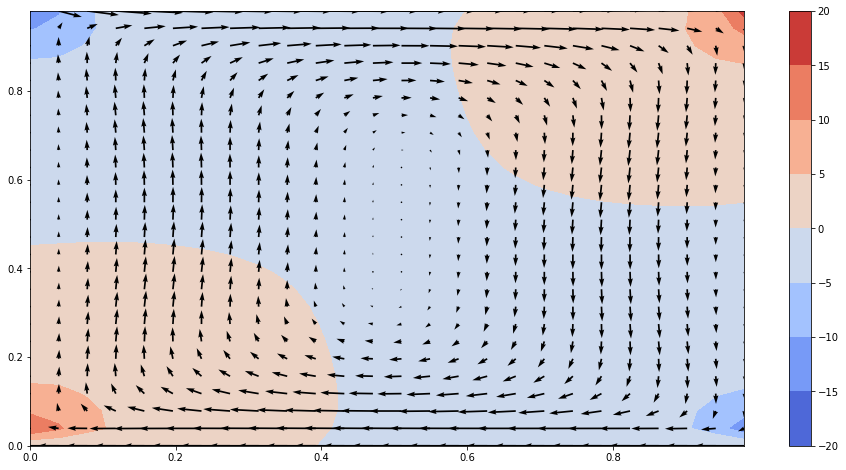

In [18]:
##initialization
m = 50
viscosity = 0.1
density = 1.0
t_0 =0.0
t_final = 1.0

X,Y,u_next,v_next,p_next = solve_navier_stokes_2D_Adams_Bashford(m, t_0, t_final, viscosity, density,True,4)

# The [::2, ::2] selects only every second entry (less cluttering plot)
#plt.style.use("dark_background")
plt.figure(figsize=(16,8))
plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="coolwarm")
plt.colorbar()

plt.quiver(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
# plt.streamplot(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
#plt.xlim((0, 1))
#plt.ylim((0, 1))
plt.show()

## Extension to Stokes Flow

ADD CITATIONS

As discussed, one the primary simplifications made to the full Navier Stokes equations involves the assumption of negligible viscosity.  This assumption allows for a reduction to the Euler equations, which has significant simplicity benefits and thus computational tractability [7].  However, much in the same way that the inviscid assumption leads to a significantly simplified governing equation, a similar simplification can be achieved by assuming the inertial forces within the flow to be negligible [9].

This type of flow is named Stokes Flow, and refers to flows in which the viscous effects of the flow structure are dominant to the point where inertial forces can be neglected [9].  Much like with Euler flow, the simplifications made to the governing equations of the fluid flow mean that it is only applicable to a specific subset of real world flows [5].  For this reason, care must be taken to ensure that the simplification to Stokes Flow is only undertaken in specific scenarios for which it is an appropriate simplification.

These scenarios include the simulation of fluids at very low Reynolds Numbers, which broadly includes fluid flows at very low pressures (such as in deep space) or with very viscous fluids [10].  In both of these cases, the inertia of the fluid flow is low in comparison to viscous effects (either because the density of the fluid is exceedingly low or because the viscosity of the fluid is exceedingly high), leading to the acceptability of the assumptions leading to Stokes Flow [10].  As an aside, it is intriguing that completely different assumptions regarding the flow structure can lead to very similar looking equations in both Euler and Stokes Flow.

In this section, we present a brief overview of the simplifications which allow the reduction of the full Navier Stokes equations to the equation governing Stokes Flow.  More importantly though, we use the foundations of Stokes Flow to embark on an exploration of Finite Element and Finite Volume methods applied to the creation of fluid flow simulations.

Though we will not dive into a detailed derivation of the analytical equations here, we note that by assuming the fluid in question to be incompressible, and by linearizing the full equations in such a way that the (assumed to be) non-dominant inertia terms are neglected, we arrive at a general form of the equations as follows [9].  In this general notation, $\mu$ is the dynamic viscosity of the fluid, $p$ is the pressure, $u$ is the velocity vector, and $\mathbf{f}$ is any applied force which acts on the fluid.

$$
\mu \nabla ^{2}\mathbf {u} -{\boldsymbol {\nabla }}p+\mathbf {f} ={\boldsymbol {0}}
$$
$$
{\boldsymbol {\nabla }}\cdot  \mathbf {u} =0
$$

In the case of a two dimensional flow with no external force being applied on the fluid, we can rewrite the below equations in a more descriptive form.

$$
\mu \left({\frac {\partial ^{2}u}{\partial x^{2}}}+{\frac {\partial ^{2}u}{\partial y^{2}}}\right)-{\frac {\partial p}{\partial x}}=0
$$

and

$$
\mu \left({\frac {\partial ^{2}v}{\partial x^{2}}}+{\frac {\partial ^{2}v}{\partial y^{2}}}\right)-{\frac {\partial p}{\partial y}}=0
$$

and

$$
\frac{\partial u }{ \partial x}+\frac{\partial v }{ \partial y}=0
$$


## References

[1] Constantin, Peter, and Ciprian Foias. Navier-stokes equations. University of Chicago Press, 2020.

[2] Gilles, Pierre, and Lemarié Rieusset. The Navier∼ Stokes Problem in the 21st Century. Chapman and Hall/CRC, 2018. APA	

[3] Bristeau, Marie Odile, Roland Glowinski, and Jacques Periaux. "Numerical methods for the Navier-Stokes equations. Applications to the simulation of compressible and incompressible viscous flows." Computer Physics Reports 6.1-6 (1987): 73-187. APA	

[4] Spalart, Philippe R. "Strategies for turbulence modelling and simulations." International journal of heat and fluid flow 21.3 (2000): 252-263. APA	

[5] Moser, R. D., P. Moin, and A. Leonard. "A spectral numerical method for the Navier-Stokes equations with applications to Taylor-Couette flow." Journal of Computational Physics 52.3 (1983): 524-544. APA	

[6] Vieillefosse, P. "Internal motion of a small element of fluid in an inviscid flow." Physica A: Statistical Mechanics and its Applications 125.1 (1984): 150-162.

[7] Jameson, Antony. "Numerical solution of the Euler equations for compressible inviscid fluids." Numerical methods for the Euler equations of Fluid Dynamics 1 (1985).

[8] Basu, B. C., and G. J. Hancock. "The unsteady motion of a two-dimensional aerofoil in incompressible inviscid flow." Journal of Fluid Mechanics 87.1 (1978): 159-178.

[9] Koplik, Joel. "Creeping flow in two-dimensional networks." Journal of Fluid Mechanics 119 (1982): 219-247.

[10] Kim, S. & Karrila, S. J. (2005) Microhydrodynamics: Principles and Selected Applications, Dover. ISBN 0-486-44219-5.

